In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import strategy.betting_logic as betting_logic
from data.data_prep import DataPrep
from pipelines.preprocessing import preprocess_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from backtest import cross_validate
from evaluation import plot_pnl
import os

from pipelines.pipeline import get_features_and_model_pipeline
path = r"c:\Users\brtnl\OneDrive\Desktop\code\sports_betting"
os.chdir(path)

warnings.simplefilter(action="ignore", category=FutureWarning)

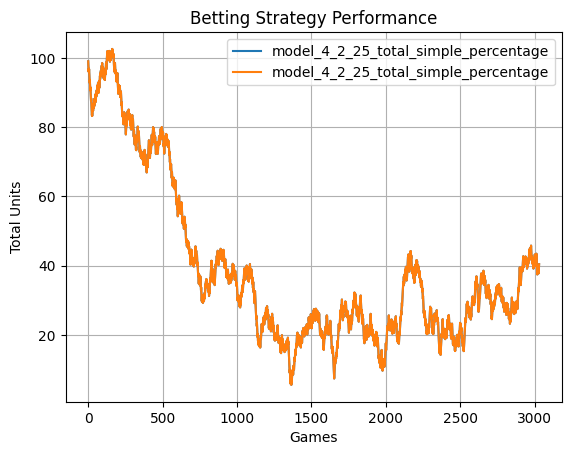

,Mean Average Error,Mean Squared Error,R-Squared,Sharpe,Net PNL,Max Drawdown
model,,,,,,
model_4_2_25_total_simple_percentage,14.74866,337.143101,-0.041425,1.655939,-59.57,-94.4
model_4_2_25_total_simple_percentage,14.74866,337.143101,-0.041425,1.655939,-59.57,-94.4


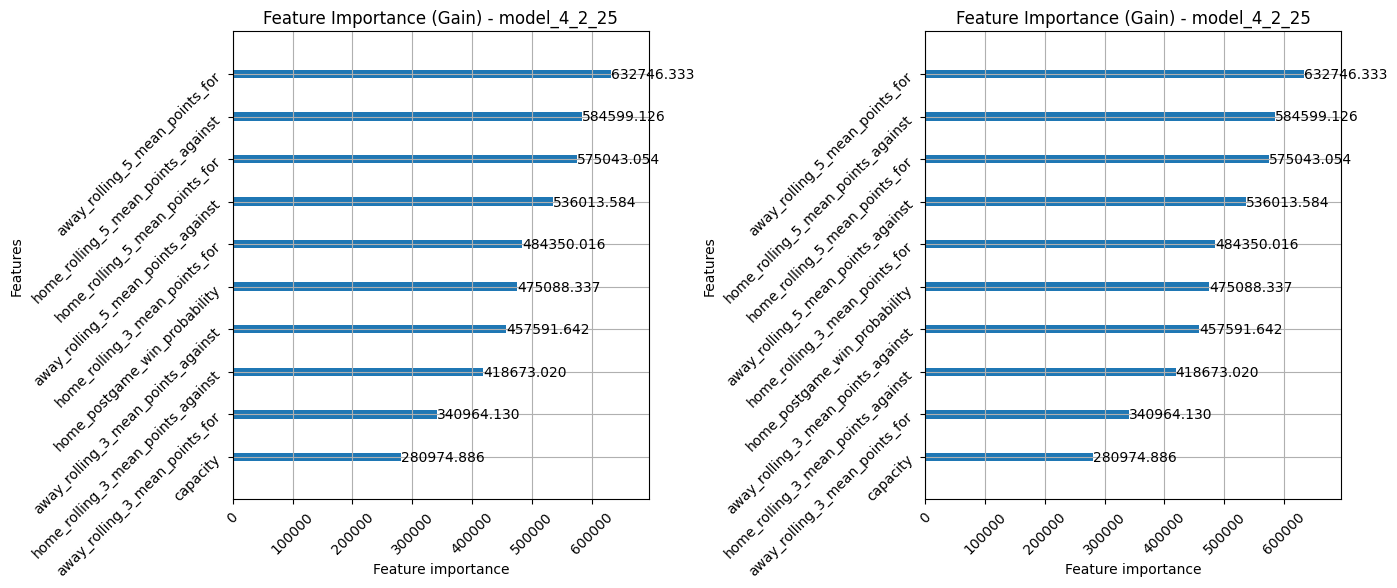

In [1]:
from evaluation import compare_models
compare_models("model_4_2_25")

In [2]:
print("Step 1: Loading data...")
data_prep = DataPrep(dataset="cfb")
raw_data = data_prep.get_data()

print("Step 2: Preprocess and separate odds, X, and y...")
preprocessed_data = preprocess_pipeline().fit_transform(raw_data)
target_col = "total"
betting_cols = ["min_ou", "max_ou"]

odds_df = preprocessed_data[[target_col] + betting_cols]
odds_df["pred"] = None
X = preprocessed_data.drop(columns=[target_col] + betting_cols)
y = preprocessed_data[target_col]

Step 1: Loading data...
Step 2: Preprocess and separate odds, X, and y...


In [3]:
# TODO: replace feature importance with a graph
print("Step 3: Training and evaluating the model...")
pipeline = get_features_and_model_pipeline()
model, odds_df = cross_validate(X, y, pipeline, odds_df, betting_logic.simple_percentage)

Step 3: Training and evaluating the model...


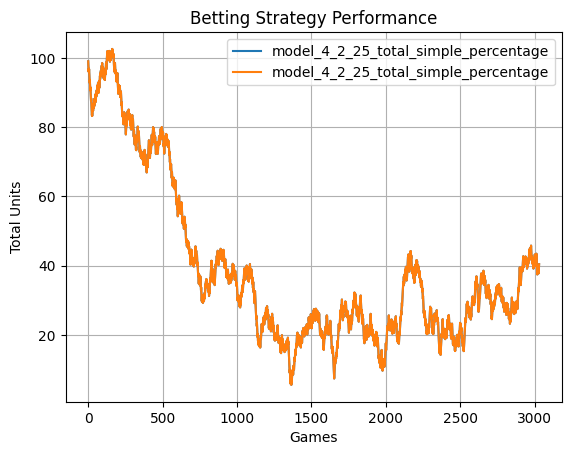

In [4]:
from evaluation import plot_pnl_comparison
plot_pnl_comparison("model_4_2_25")

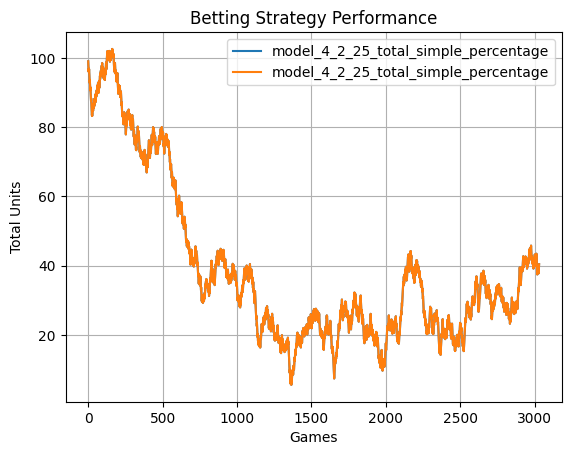

                                      Mean Average Error  Mean Squared Error  \
model                                                                          
model_4_2_25_total_simple_percentage            14.74866          337.143101   
model_4_2_25_total_simple_percentage            14.74866          337.143101   

                                      R-Squared    Sharpe  
model                                                      
model_4_2_25_total_simple_percentage  -0.041425  1.655939  
model_4_2_25_total_simple_percentage  -0.041425  1.655939  


c:\Users\brtnl\OneDrive\Desktop\code\sports_betting\src\cfb\evaluation.py:197: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


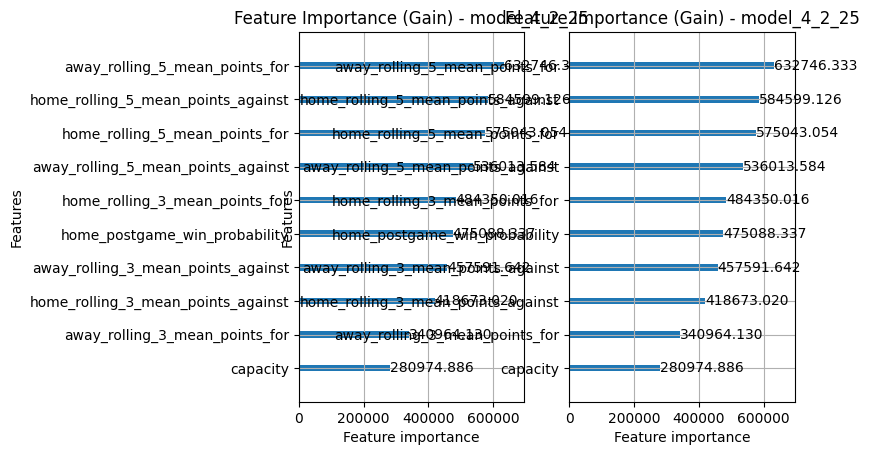